# Importing Modules

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = (12, 7)

In [43]:
import warnings
warnings.simplefilter(action="ignore")

# Loading Data

In [44]:
dataset = pd.read_csv("D:/CHAND's DATA/Study data/Additional Work/Data Science/Course/Practice/Data-Science-Projects/BreastCancer Prediction using Logistic Regression/breastcancer.csv")
dataset.shape

(569, 13)

# Data Preprocessing

In [45]:
dataset.drop(["id", "name"], axis=1, inplace=True)
dataset.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31,1
3,NaN,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20,1


In [46]:
dataset.shape

(569, 11)

In [47]:
dataset1.isnull().sum()

radius               71
texture               0
perimeter             0
area                  0
smoothness            0
compactness           0
concavity             0
symmetry              0
fractal_dimension     0
age                   0
diagnosis             0
dtype: int64

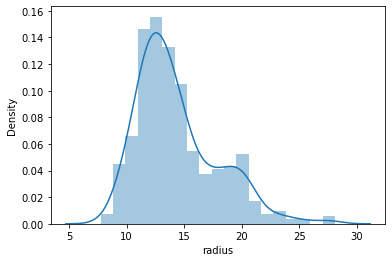

In [48]:
sns.distplot(dataset.radius)

Data is skewed so according to Nouman wee have to fill NAN with median not with mean.

In [49]:
dataset.radius.fillna(value=dataset.radius.median(), inplace=True)

In [50]:
dataset.isnull().sum().sum()

0

In [51]:
# Dropping NAN rows
dataset2 = dataset1.dropna()
dataset2.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.1812,0.05667,27,1
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.19740,0.2069,0.05999,31,1
4,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.19800,0.1809,0.05883,20,1
6,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.1794,0.05742,38,1
10,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.1528,0.05697,51,1


In [52]:
# Separating dependent and Independent variables
x = dataset.drop('diagnosis', axis=1)
y = dataset['diagnosis']

# Spliting Data

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

# Creating Logistic Model

In [88]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [89]:
log_model.fit(x_train, y_train)

LogisticRegression()

In [90]:
pred = log_model.predict(x_test)

In [91]:
log_model.score(x, y)

0.8980667838312829

In [92]:
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test, pred)
con

array([[103,   9],
       [  7,  52]], dtype=int64)

In [93]:
from sklearn.metrics import classification_report
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.92      0.93       112\n           1       0.85      0.88      0.87        59\n\n    accuracy                           0.91       171\n   macro avg       0.89      0.90      0.90       171\nweighted avg       0.91      0.91      0.91       171\n'

In [94]:
# Calculating accuracy of confusion matrix
acc = (con[(0,0)] + con[(1,1)])/(con[(0,0)] + con[(0,1)] + con[(1,0)] + con[(1,1)])
acc

0.9064327485380117

# Creating KNN Model

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
# Findind best K value
error_rate = []

for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    i_pred = model.predict(x_test)
    error_rate.append(np.mean(i_pred != y_test))

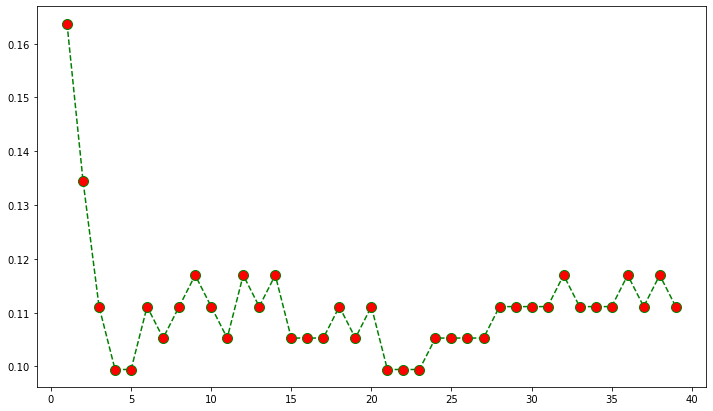

In [111]:
plt.plot(range(1, 40), error_rate, linestyle="--", marker="o", color='green', markerfacecolor='red', markersize=10)
plt.show()

So K=4=5 is giving less error_rate.

In [112]:
kmodel = KNeighborsClassifier(n_neighbors=4)
kmodel.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [113]:
y_pred = kmodel.predict(x_test)
kmodel.score(x_test, y_test)

0.9005847953216374

In [114]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[108,  13],
       [  4,  46]], dtype=int64)